In [1]:
import numpy as np 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split


In [2]:
cancer_df = pd.read_csv('breast_cancer_prediction.csv')
print(cancer_df.shape)
cancer_df.head()
cancer_df.shape






(569, 33)


(569, 33)

## checking null values

In [3]:
cancer_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## removing unnecessary columns 

In [4]:
cancer = cancer_df
cancer.drop(columns=['id','Unnamed: 32'],inplace=True)


# 

In [5]:
# cancer.info()
cancer['diagnosis'] = cancer['diagnosis'].astype(str)
# cancer.info()
cancer['diagnosis'] = cancer['diagnosis'].apply(lambda x: 0 if x =="B" else 1)

cancer.info()



    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
cancer.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
X = cancer.drop(columns=['diagnosis']).to_numpy()
y = cancer['diagnosis'].to_numpy()
# y = np.reshape(cancer['diagnosis'],(-1, 1))
X_train, X_dev_test, y_train, y_dev_test = train_test_split(X, y , test_size = 0.3, random_state=0, shuffle= True)
X_dev, X_test, y_dev, y_test = train_test_split(X_dev_test, y_dev_test, test_size = 0.5, random_state=0)



In [42]:
print(X_train[:,:3])
print(y_train.shape)
print(X_dev.shape)
print(X_test.shape)

[[11.49  14.59  73.99 ]
 [10.49  18.61  66.86 ]
 [12.25  17.94  78.27 ]
 ...
 [ 9.436 18.32  59.82 ]
 [ 9.72  18.22  60.73 ]
 [11.51  23.93  74.52 ]]
(398,)
(85, 30)
(86, 30)


# making the network from scratch


### initializing parameters

In [ ]:
layer_dimentions = [32, 16, 1] #three layers model 

In [58]:
def initialize_parameters(X, layer_dim):
    '''
    X.shape should be (n_features, n_examples)
    retuers the parameters dict
    '''
    input_dim = X.shape[1]
    layer_dim = [input_dim] + layer_dim
    parameters = []

    for l in range(1, len(layer_dim)):
        parameters["W" + str(l)] = np.random.rand(layer_dim[l], layer_dim[l-1]) / np.sqrt(layer_dim[l-1]) # xavier idea 
        parameters["b" + str(l)] = np.random.rand(layer_dim[l], 1) # initialized with 0 because it doesn't affect exploding or vanishing gradients
    return parameters

### activation forward

In [52]:
def forward_layer_activation(previous_act, W, b, activation )
    '''
    returns the activation for current layer
    '''

SyntaxError: invalid syntax (3149020750.py, line 1)

In [53]:
def relu(z):
    a = np.maximum(0, z)
    cache = z
    return a, cache

def sigmoid(z):
    a =  1/(1-np.exp(-z))
    cache = z
    return a, cache


def relu_backward(dA, cache):
    z = cache
    dz = np.copy(dA)
    dz[z <= 0] = 0
    return dz
def sigmoid_backward(dA, cache):
    z = cache
    s = 1/(1-np.exp(-z))
    dz = dA * s *(1- s)
    return 


In [54]:
def linear_forward(previous_A, W, b):
    z = np.dot(W, previous_A) + b
    cache = (previous_A, W, b)
    return z, cache

In [56]:
def forward_prop(previous_A, W, b ,activation ):
    """returns AL the last output of the net
       rerturn caches
    """
    if activation == 'relu' :
        z, linear_cache = linear_forward(previous_A, W, b)
        A, activation_cache = relu(z)
    elif activation == 'sigmoid':
        z, linear_cache = linear_forward(previous_A, W, b)
        A, activation_cache = sigmoid(z)
    cache = (linear_cache, activation_cache)
    return A, cache

In [63]:
def Model_forward(X, parameters) :
    """
    returns the final AL
    returns caches of all the hidden layers 
    """
    A = X
    caches = []
    n_layers = len(parameters)//2
    for l in range(1, n_layers):
        A, cache = forward_prop(A, parameters['W' + str(l)], parameters['b' + str(l)], activation='relu')
        caches.append(cache)
    AL , cache = forward_prop(A, parameters['W' + str(n_layers)], parameters['b' + str(n_layers)], activation='sigmoid')
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
    return AL, caches

In [ ]:
def get_cost(AL, Y, , parameters = False , lambda_reg = 0):
    '''
    this is a binary_crossentropy  loss for the whole net layers with optional regularidsghlds
    if parameters are given with regularizer we can do regularization 
    lambda_reg is the regularization hyperparameter
    '''
    m = Y.shape[1]
    J = -1/m * np.sum(np.dot(AL,np.log(Y)) + (1-AL).dot(np.log(1-Y))) 
    if parameters :
        weights = 0
        for item in parameters.items():
            if item[0].startswith("W"): 
                weights += np.sum(item[1]**2)
        cost = J + lambda_reg/(2*m) * weights
    else : 
        cost = J 
    return cost
    

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train = scaler.fit_transform(X_train)
# Transform the dev and test data using the same scaler
X_test = scaler.transform(X_test)
X_dev  = scaler.transform(X_dev)

In [47]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50,validation_data=(X_dev, y_dev), verbose=0)
# model.summary()

In [48]:
# validation_data=(X_dev, y_dev)
# validation_split=0.2

# history = model.fit(X_train, y_train, epochs=20,validation_data=(X_dev, y_dev))


3/3 [==============================] - 0s 6ms/step - loss: 0.0426 - accuracy: 0.9882
val accuracy: 0.99
3/3 [==============================] - 0s 6ms/step - loss: 0.1109 - accuracy: 0.9535
Test accuracy: 0.95
13/13 [==============================] - 0s 5ms/step - loss: 0.0371 - accuracy: 0.9899
train accuracy: 0.99


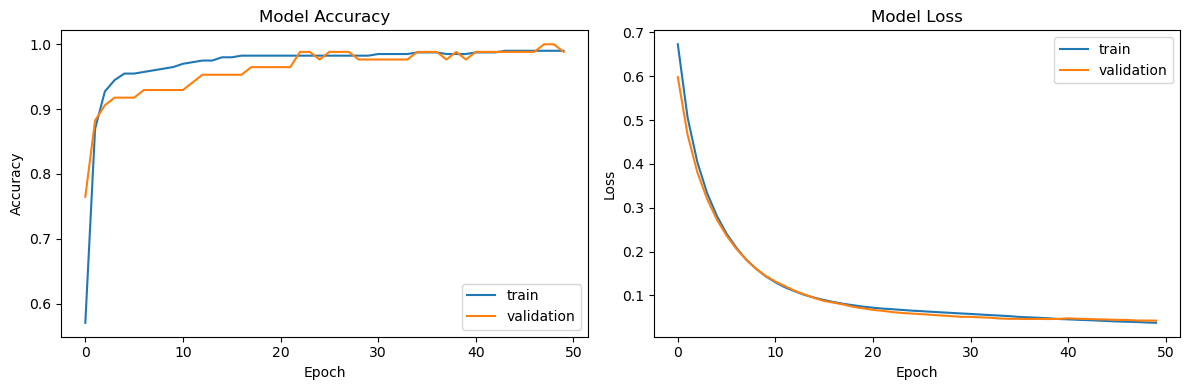

In [49]:
loss, accuracy = model.evaluate(X_dev, y_dev)
print(f'val accuracy: {accuracy:.2f}')
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')
loss, accuracy = model.evaluate(X_train, y_train)
print(f'train accuracy: {accuracy:.2f}')


# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()